In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = {
    "roll": [1,2,3,4,5,6,7,8,9,10],
    "name": ["A","B","C","D","E","F","G","H","I","J"],
    "gender": ["male","male","female","female","male","female","male","female","male","male"],
    "marks": [90,160,86,np.nan,91,92,68,np.nan,-40,98]
}

In [21]:
df = pd.DataFrame(data)

In [22]:
df

,roll,name,gender,marks
0,1,A,male,90.0
1,2,B,male,160.0
2,3,C,female,86.0
3,4,D,female,NaN
4,5,E,male,91.0
5,6,F,female,92.0
6,7,G,male,68.0
7,8,H,female,NaN
8,9,I,male,-40.0
9,10,J,male,98.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   roll    10 non-null     int64  
 1   name    10 non-null     object 
 2   gender  10 non-null     object 
 3   marks   8 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 448.0+ bytes


In [6]:
df.describe()

,roll,marks
count,10.00000,8.000000
mean,5.50000,80.625000
std,3.02765,55.633848
min,1.00000,-40.000000
25%,3.25000,81.500000
50%,5.50000,90.500000
75%,7.75000,93.500000
max,10.00000,160.000000


In [7]:
df.isna()

,roll,name,gender,marks
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,True
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,True
8,False,False,False,False
9,False,False,False,False


In [8]:
df.isna().sum()

roll      0
name      0
gender    0
marks     2
dtype: int64

In [9]:
df.dropna()

,roll,name,gender,marks
0,1,A,male,90.0
1,2,B,male,160.0
2,3,C,female,86.0
4,5,E,male,91.0
5,6,F,female,92.0
6,7,G,male,68.0
8,9,I,male,-40.0
9,10,J,male,98.0


In [10]:
marks_mean = df["marks"].mean()

In [11]:
marks_mean

80.625

In [12]:
df["marks"].fillna(marks_mean,inplace=True)

In [26]:
df

,roll,name,gender,marks
0,1,A,male,90.0
1,2,B,male,160.0
2,3,C,female,86.0
3,4,D,female,NaN
4,5,E,male,91.0
5,6,F,female,92.0
6,7,G,male,68.0
7,8,H,female,NaN
8,9,I,male,0.0
9,10,J,male,98.0


<AxesSubplot:xlabel='marks'>

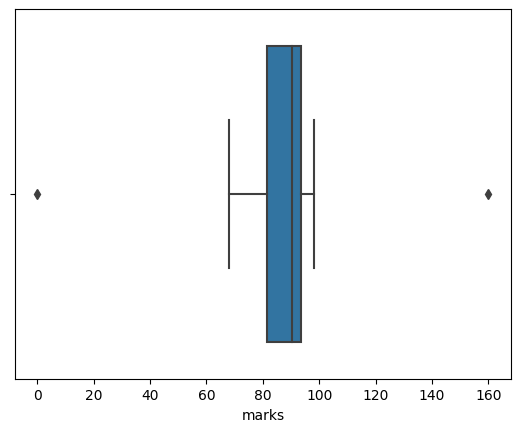

In [27]:
sns.boxplot(data=df, x="marks")

In [28]:
from matplotlib.cbook import boxplot_stats  
outliers = boxplot_stats(df['marks']).pop(0)['fliers']
outliers

array([], dtype=float64)

In [17]:
df1 = df[df["marks"]<100]

In [18]:
df1

,roll,name,gender,marks
0,1,A,male,90.000
2,3,C,female,86.000
3,4,D,female,80.625
4,5,E,male,91.000
5,6,F,female,92.000
6,7,G,male,68.000
7,8,H,female,80.625
8,9,I,male,-40.000
9,10,J,male,98.000


In [23]:
df["marks"]  = np.where(df["marks"]<0,0,df["marks"])

In [24]:
df

,roll,name,gender,marks
0,1,A,male,90.0
1,2,B,male,160.0
2,3,C,female,86.0
3,4,D,female,NaN
4,5,E,male,91.0
5,6,F,female,92.0
6,7,G,male,68.0
7,8,H,female,NaN
8,9,I,male,0.0
9,10,J,male,98.0


In [135]:
df1.drop([8],axis=0)

,roll,name,gender,marks
0,1,A,male,90.000
2,3,C,female,86.000
3,4,D,female,80.625
4,5,E,male,91.000
5,6,F,female,92.000
6,7,G,male,68.000
7,8,H,female,80.625
9,10,J,male,98.000


In [136]:
scaler = MinMaxScaler()
df1[["marks"]] = scaler.fit_transform(df1[["marks"]])

C:\Users\Dell\AppData\Local\Temp\ipykernel_12820\634145303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[["marks"]] = scaler.fit_transform(df1[["marks"]])


In [137]:
df1

,roll,name,gender,marks
0,1,A,male,0.942029
2,3,C,female,0.913043
3,4,D,female,0.874094
4,5,E,male,0.949275
5,6,F,female,0.956522
6,7,G,male,0.782609
7,8,H,female,0.874094
8,9,I,male,0.000000
9,10,J,male,1.000000
